# Simple Linear Regression Project

This notebook demonstrates a **Simple Linear Regression** model using Python's machine learning libraries. The goal is to predict a continuous target variable based on a single feature, using linear regression techniques.

## Steps in This Notebook

1. **Library Imports**  
   We start by importing essential libraries like `pandas`, `numpy`, and `matplotlib` for data manipulation and visualization. The `linear_model` module from `sklearn` provides the regression model, and `seaborn` helps enhance the visualization.

2. **Data Loading and Exploration**  
   We load our dataset and perform an initial inspection to understand its structure and main features.

3. **Data Preprocessing**  
   The dataset is split into **features (X)** and **target variable (y)**, followed by splitting it into training and testing sets.

4. **Model Creation and Training**  
   Using **Simple Linear Regression**, we train a model to learn the relationship between the feature and target.

5. **Prediction and Evaluation**  
   The model’s predictions are compared to the actual values to assess accuracy.

6. **Visualization**  
   We plot the regression line to visualize the fit on both the training and testing datasets.

---

Let's begin by importing the necessary libraries:


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  sklearn import linear_model
import seaborn as sns

## Data Loading and Initial Exploration

In this section, we load our dataset from a CSV file named **"Co2.csv"** into a pandas DataFrame. This dataset contains the data we need for our simple linear regression analysis.

- **`df.head()`**: Displays the first few rows of the dataset to help us understand its structure and contents.

Let's load and preview the data:


In [4]:
df=pd.read_csv("Co2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Dataset Summary Statistics

To gain insights into the dataset's numerical features, we generate descriptive statistics using **`df.describe()`**. This summary provides important metrics such as:

- **Mean** and **standard deviation** for understanding the distribution.
- **Minimum**, **maximum**, and **quartile values** to identify potential outliers or skewness in the data.

Let's examine the summary statistics:


In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


## DataFrame Summary

In this section, we use the **`df.info()`** method to obtain a concise summary of our DataFrame. This summary provides essential insights into the structure and composition of the dataset.

- **Index Range**: Displays the range of index entries.
- **Number of Entries**: Shows the total number of rows in the DataFrame.
- **Columns**: Lists the names of the columns along with their data types and the number of non-null values.
- **Memory Usage**: Indicates the memory used by the DataFrame.

Let's execute the summary command:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


## Unique Values in Each Column

In this section, we iterate through each column in the DataFrame to display the unique values contained within. This helps us understand the variability and distinct entries in each column.

The following code performs the following actions:
- Loops through each column in the DataFrame.
- Prints the name of the column.
- Displays the unique values for that column.

Let's execute the code to view the unique values:


In [7]:
for col in df.columns:
    print(f"col_name: {col}")
    print(df[col].unique())
    print("\n")
    


col_name: MODELYEAR
[2014]


col_name: MAKE
['ACURA' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK' 'CADILLAC'
 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA' 'HYUNDAI'
 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER' 'LEXUS'
 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI' 'NISSAN'
 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU' 'TOYOTA'
 'VOLKSWAGEN' 'VOLVO']


col_name: MODEL
['ILX' 'ILX HYBRID' 'MDX 4WD' 'RDX AWD' 'RLX' 'TL' 'TL AWD' 'TSX' 'DB9'
 'RAPIDE' 'V8 VANTAGE' 'V8 VANTAGE S' 'VANQUISH' 'A4' 'A4 QUATTRO'
 'A5 CABRIOLET QUATTRO' 'A5 QUATTRO' 'A6 QUATTRO'
 'A6 QUATTRO TDI CLEAN DIESEL' 'A7 QUATTRO' 'A7 QUATTRO TDI CLEAN DIESEL'
 'A8' 'A8 TDI CLEAN DIESEL' 'A8L' 'A8L TDI CLEAN DIESEL' 'ALLROAD QUATTRO'
 'Q5' 'Q5 HYBRID' 'Q5 TDI CLEAN DIESEL' 'Q7' 'Q7 TDI CLEAN DIESEL' 'R8'
 'R8 SPYDER' 'RS5' 'RS5 CABRIOLET' 'RS7' 'S4' 'S5' 'S5 CABRIOLET' 'S6'
 'S7' 'S8' 'SQ5' 'TT COUPE QUATTRO' 'TT ROADSTER QUATTRO'
 'TTS COUPE QUATTRO' 'TTS

## Creating a Subset of the DataFrame

In this section, we create a new DataFrame named **`cdf`** that contains a subset of columns from the original DataFrame **`df`**. This subset focuses on key attributes relevant to our analysis.

The selected columns are:
- **`MODELYEAR`**: The year the vehicle model was manufactured.
- **`ENGINESIZE`**: The size of the engine, typically measured in liters.
- **`CYLINDERS`**: The number of cylinders in the engine.
- **`FUELTYPE`**: The type of fuel used by the vehicle.
- **`FUELCONSUMPTION_CITY`**: Fuel consumption in city driving conditions.
- **`FUELCONSUMPTION_HWY`**: Fuel consumption on highways.
- **`FUELCONSUMPTION_COMB`**: Combined fuel consumption.
- **`FUELCONSUMPTION_COMB_MPG`**: Combined fuel consumption measured in miles per gallon.
- **`CO2EMISSIONS`**: The amount of carbon dioxide emissi


In [8]:
cdf=df[['MODELYEAR','ENGINESIZE','CYLINDERS', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']]

## Previewing the Subset DataFrame

In this section, we use the **`cdf.head()`** method to display the first few rows of the newly created subset DataFrame **`cdf`**. This allows us to quickly inspect the data and ensure that the subset contains the expected columns and values.

Let's execute the command to preview the data:


In [9]:
cdf.head()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,2.0,4,Z,9.9,6.7,8.5,33,196
1,2014,2.4,4,Z,11.2,7.7,9.6,29,221
2,2014,1.5,4,Z,6.0,5.8,5.9,48,136
3,2014,3.5,6,Z,12.7,9.1,11.1,25,255
4,2014,3.5,6,Z,12.1,8.7,10.6,27,244


## Mapping Fuel Type to Numeric Labels

In this section, we define a mapping for the **`FUELTYPE`** column in the subset DataFrame **`cdf`**. The mapping assigns numeric labels to different fuel types to facilitate analysis and modeling.

The mapping is defined as follows:
- **`'E'`**: 0
- **`'X'`**: 1
- **`'D'`**: 2
- **`'Z'`**: 3

Next, we apply this mapping to the **`FUELTYPE`** column using the **`map()`** method, which replaces the categorical fuel type values with their corresponding numeric labels.

Let's execute the mapping:


In [10]:
label_mapping = {
    'E': 0,
    'X': 1,
    'D': 2,
    "Z":3
}
cdf.loc[:, 'FUELTYPE'] = cdf['FUELTYPE'].map(label_mapping)

## Previewing the Updated Subset DataFrame

In this section, we use the **`cdf.head()`** method to display the first few rows of the updated subset DataFrame **`cdf`**. This allows us to verify that the mapping of fuel types to numeric labels has been successfully applied and to inspect how the changes from the **`label_mapping`** have affected the **`FUELTYPE`** column.

Let's execute the command to preview the updated data and see the changes:


In [9]:
cdf.head()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,2.0,4,3,9.9,6.7,8.5,33,196
1,2014,2.4,4,3,11.2,7.7,9.6,29,221
2,2014,1.5,4,3,6.0,5.8,5.9,48,136
3,2014,3.5,6,3,12.7,9.1,11.1,25,255
4,2014,3.5,6,3,12.1,8.7,10.6,27,244


## Analyzing Correlation with CO2 Emissions

In this section, we calculate the correlation matrix for the subset DataFrame **`cdf`** using the **`corr()`** method. This matrix helps us understand the relationships between the different numerical features in the dataset.

We then extract and display the correlation values for **`CO2EMISSIONS`**, sorting them in descending order to identify which features have the strongest positive or negative correlations with CO2 emissions.

Let's execute the command to analyze the correlations:


In [12]:
corr=cdf.corr()
print(corr['CO2EMISSIONS'].sort_values(ascending=False))

CO2EMISSIONS                1.000000
FUELCONSUMPTION_CITY        0.898039
FUELCONSUMPTION_COMB        0.892129
ENGINESIZE                  0.874154
FUELCONSUMPTION_HWY         0.861748
CYLINDERS                   0.849685
FUELTYPE                    0.091596
FUELCONSUMPTION_COMB_MPG   -0.906394
MODELYEAR                        NaN
Name: CO2EMISSIONS, dtype: float64


## Visualizing the Correlation Matrix

In this section, we create a heatmap to visualize the correlation matrix using the **`seaborn`** library. The heatmap provides a graphical representation of the correlations between the numerical features in the subset DataFrame **`cdf`**.

- **`plt.figure(figsize=(8, 6))`**: Sets the size of the figure for better visibility.
- **`sns.heatmap(corr, annot=True, cmap='coolwarm')`**: Creates the heatmap with annotations to show the correlation coefficients, using the 'coolwarm' color palette.
- **`plt.title('Correlation Matrix Heatmap')`**: Sets the title of the heatmap.
- **`plt.show()`**: Displays the heatmap.

Let's execute the code to visualize the correlation matrix:


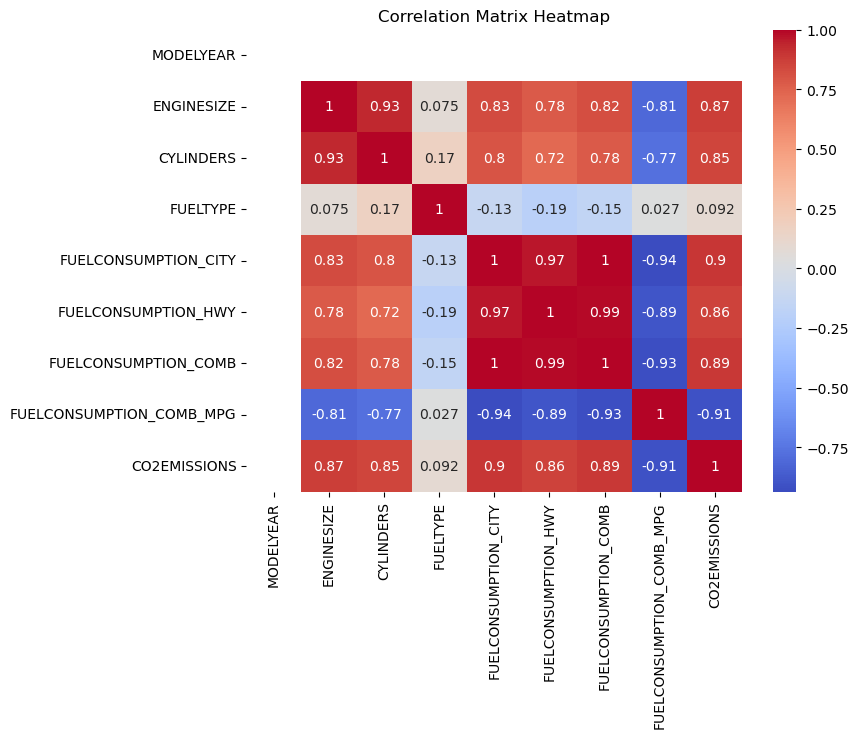

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

## Dropping the MODELYEAR Column

In this section, we remove the **`MODELYEAR`** column from the subset DataFrame **`cdf`** using the **`drop()`** method. The reason for this action is that the model year may not have a direct influence on the target variable **`CO2EMISSIONS`**, or it may be correlated with other features, leading to multicollinearity.

Removing this column helps simplify the dataset and can improve the performance of the model by reducing noise and irrelevant information.

Let's execute the code to drop the column:


In [18]:
cdf=cdf.drop('MODELYEAR', axis=1)

## Previewing the Updated Subset DataFrame

In this section, we use the **`cdf.head()`** method to display the first few rows of the updated subset DataFrame **`cdf`** after removing the **`MODELYEAR`** column. This allows us to verify that the column has been successfully dropped and to inspect the current state of the data.

By previewing the DataFrame, we can ensure that the remaining features are correctly aligned with our analysis objectives, particularly in relation to the **`CO2EMISSIONS`** target variable.

Let's execute the command to preview the updated data:


In [19]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,3,9.9,6.7,8.5,33,196
1,2.4,4,3,11.2,7.7,9.6,29,221
2,1.5,4,3,6.0,5.8,5.9,48,136
3,3.5,6,3,12.7,9.1,11.1,25,255
4,3.5,6,3,12.1,8.7,10.6,27,244


## Visualizing Relationships with CO2 Emissions

In this section, we create scatter plots to visualize the relationships between each feature in the subset DataFrame **`cdf`** (excluding the **`quality`** column) and the target variable **`CO2EMISSIONS`**. Scatter plots help us understand how each feature affects CO2 emissions, identifying trends or patterns.

- **`rows, cols = 2, 4`**: Sets the number of rows and columns for the subplot layout.
- **`plt.figure(figsize=(20, 15))`**: Creates a new figure with a specified size for better visibility.
- **`enumerate([...])`**: Loops through each column, excluding the **`quality`** column.
- **`plt.subplot(rows, cols, i + 1)`**: Defines the subplot position for each scatter plot.
- **`sns.scatterplot(data=cdf, x=col, y='CO2EMISSIONS')`**: Plots a scatter plot for each feature against CO2 emissions.
- **`plt.title(f'{col} vs CO2EMISSIONS')`**: Sets the title for each subplot.
- **`plt.tight_layout()`**: Adjusts the layout to prevent overlap of subplots.
- **`plt.show()`**: Displays the scatter plots.

Let's execute the code to visualize these relationships:


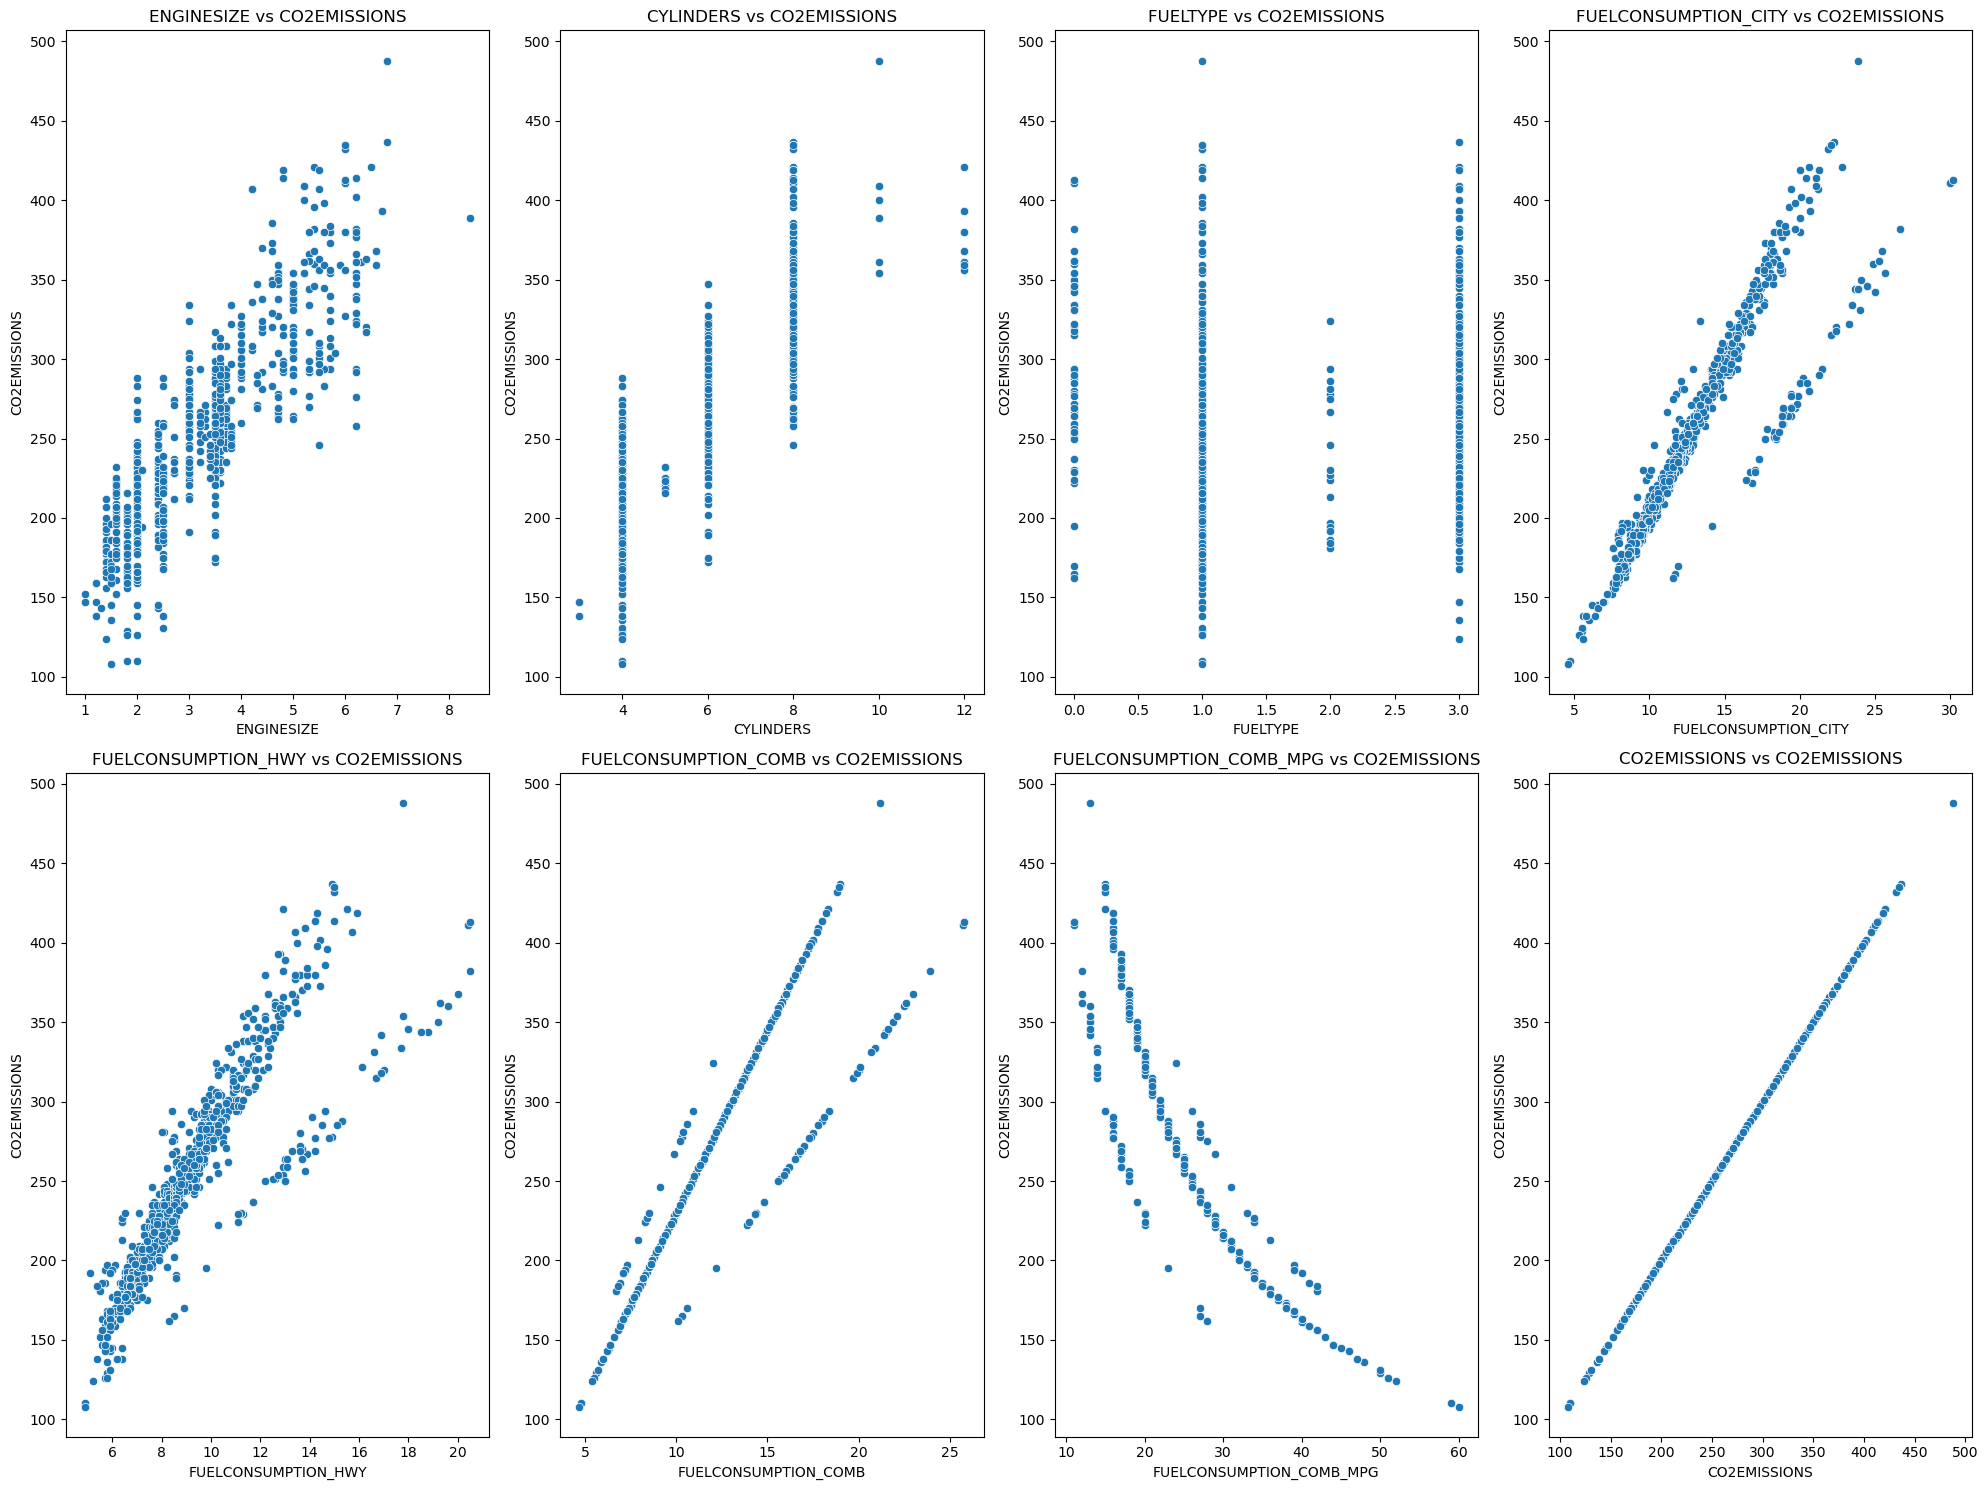

In [20]:
rows, cols = 2, 4 
plt.figure(figsize=(20, 15))

for i, col in enumerate([c for c in cdf.columns if c != "quality"]):
    plt.subplot(rows, cols, i + 1)
    sns.scatterplot(data=cdf, x=col, y='CO2EMISSIONS')
    plt.title(f'{col} vs CO2EMISSIONS')

plt.tight_layout()
plt.show()

## Visualizing Relationships with CO2 Emissions Using Scatter Plots

In this section, we create scatter plots to visualize the relationships between each feature in the subset DataFrame **`cdf`** (excluding the **`quality`** column) and the target variable **`CO2EMISSIONS`**. Scatter plots help us understand how each feature affects CO2 emissions, identifying trends or patterns.

- **`rows, cols = 2, 4`**: Sets the number of rows and columns for the subplot layout.
- **`plt.figure(figsize=(20, 15))`**: Creates a new figure with a specified size for better visibility.
- **`enumerate([...])`**: Loops through each column, excluding the **`quality`** column.
- **`plt.subplot(rows, cols, i + 1)`**: Defines the subplot position for each scatter plot.
- **`plt.scatter(data=cdf, x=col, y='CO2EMISSIONS')`**: This line attempts to create a scatter plot using Matplotlib's **`scatter`** function.
  
  **Differences between `plt.scatter` and `sns.scatterplot`:**
  
  - **Functionality**: 
    - **`plt.scatter`** is a basic scatter plot function provided by Matplotlib. It is generally used for simple plotting but may require additional configuration for features such as color mapping, size variations, and handling of data categories.
    - **`sns.scatterplot`** is part of the Seaborn library, which is built on top of Matplotlib. It offers enhanced features such as automatic handling of categorical variables, better color palettes, and integrated support for statistical visualizations. 

  - **Aesthetics**: 
    - **`sns.scatterplot`** provides a more visually appealing and informative default style compared to **`plt.scatter`**. It includes features such as automatic regression line fitting and improved handling of data distributions.
  
- **`plt.title(f'{col} vs CO2EMISSIONS')`**: Sets the title for each subplot.
- **`plt.tight_layout()`**: Adjusts the layout to prevent overlap of subplots.
- **`plt.show()`**: Displays the scatter plots.

Let's execute the code to visualize these relationships:


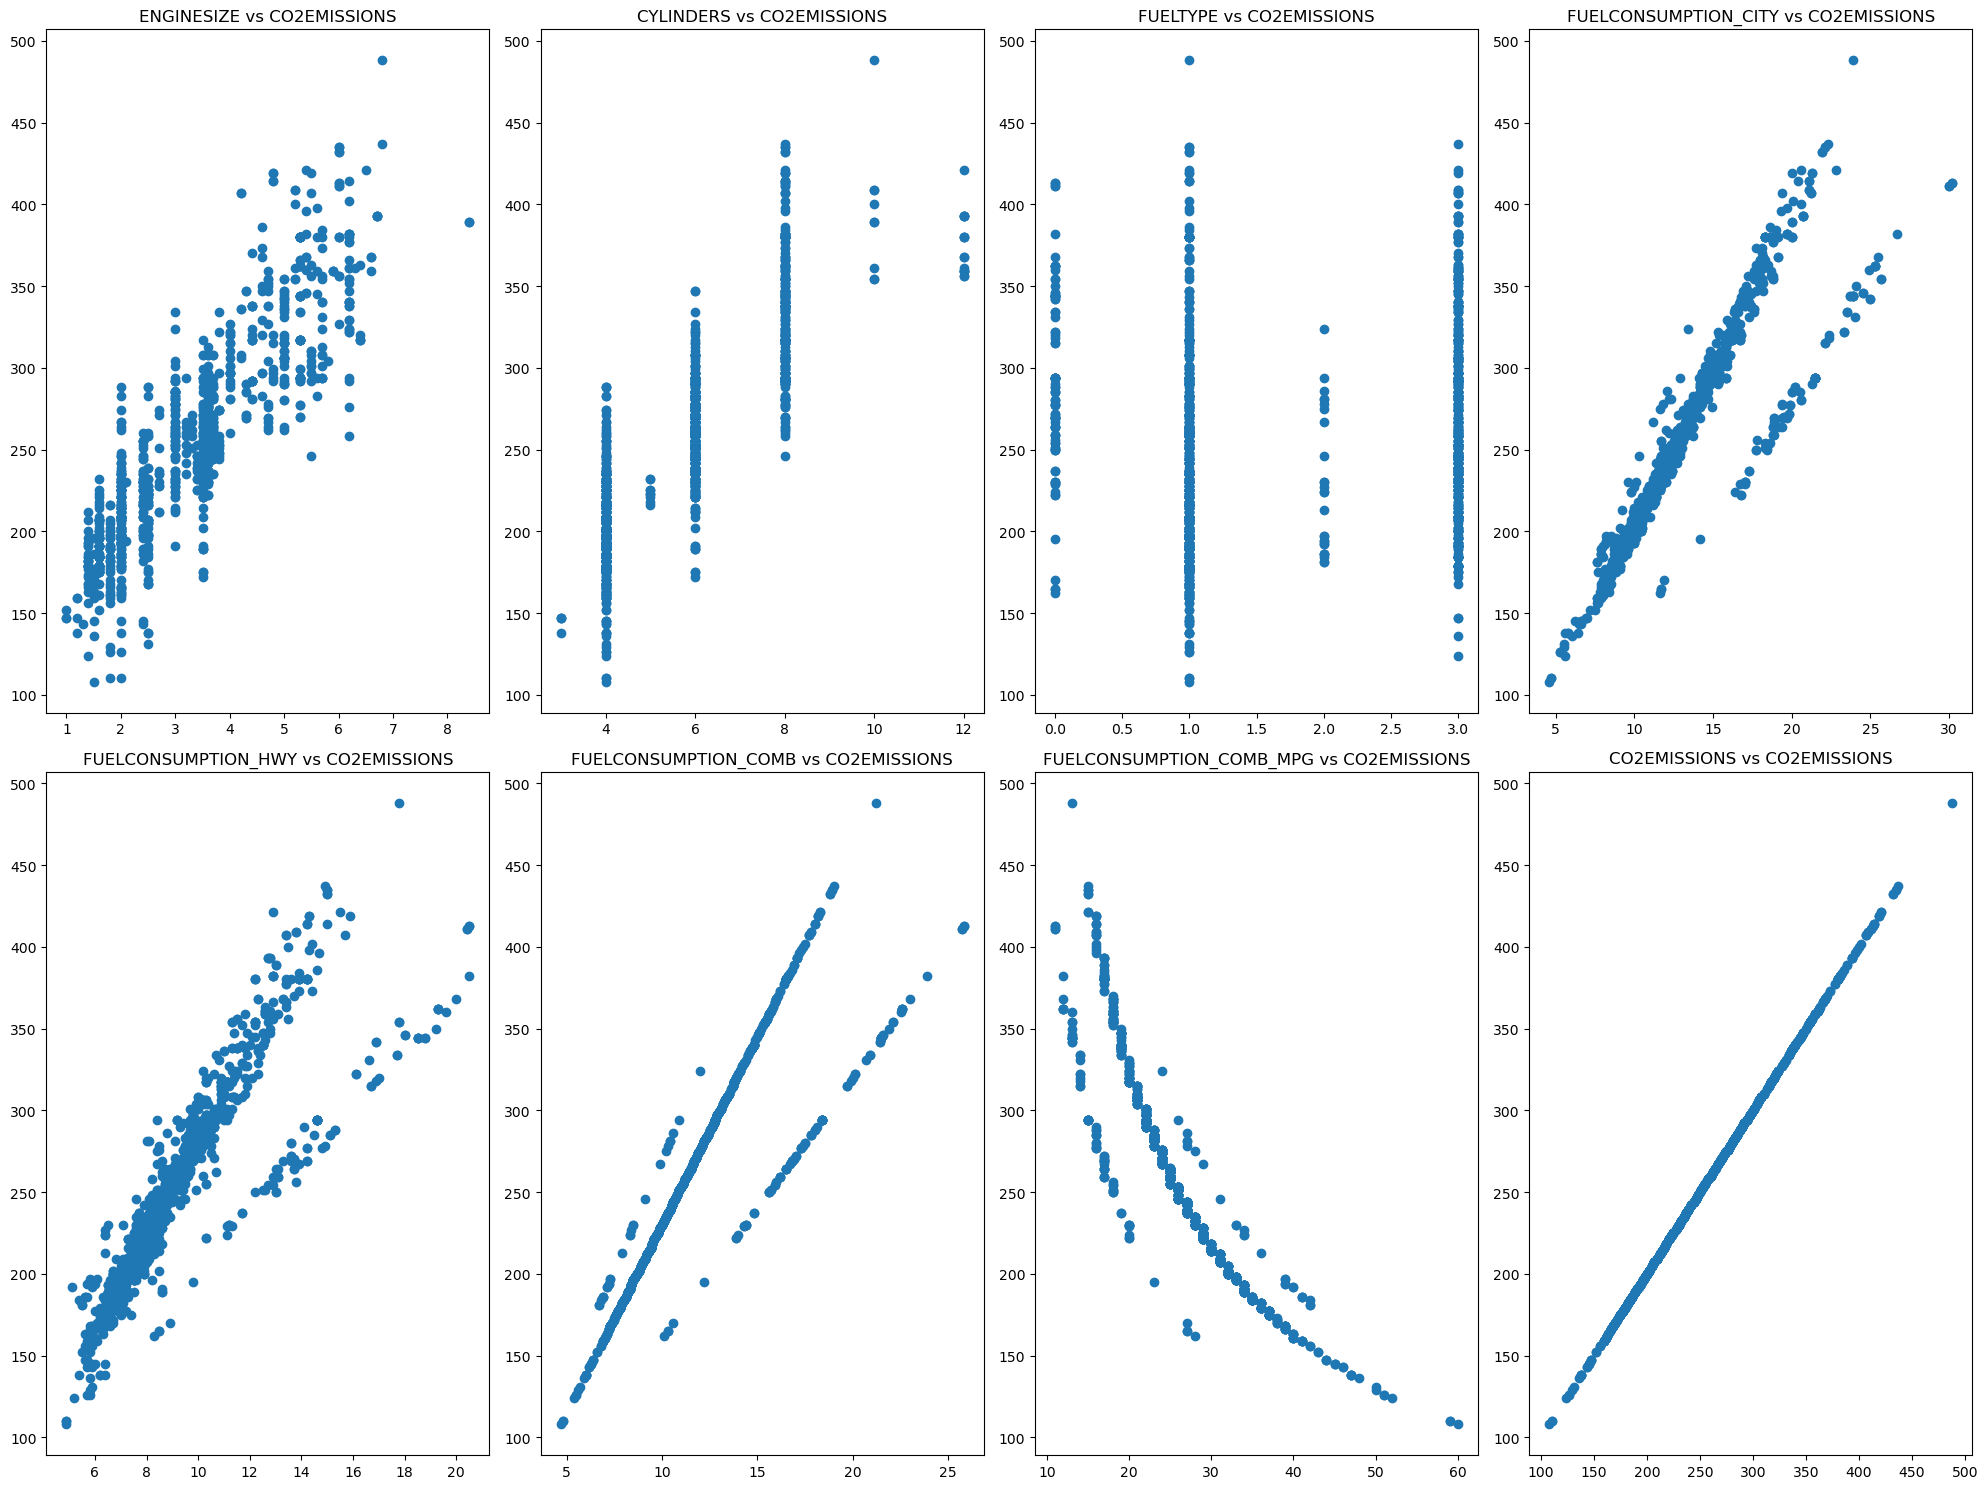

In [23]:
rows, cols = 2, 4
plt.figure(figsize=(20, 15))
for i, col in enumerate([c for c in cdf.columns if c != "quality"]):
    plt.subplot(rows, cols, i + 1)
    plt.scatter(data=cdf, x=col, y='CO2EMISSIONS')
    plt.title(f'{col} vs CO2EMISSIONS')

plt.tight_layout()
plt.show()

## Splitting the Dataset into Training and Testing Sets

In this section, we split our dataset into training and testing sets using the **`train_test_split`** function from the **`sklearn.model_selection`** module. This allows us to train our model on one portion of the data and evaluate its performance on an unseen portion.

- **`X = cdf.drop('CO2EMISSIONS', axis=1)`**: Defines the feature set by dropping the target variable **`CO2EMISSIONS`** from the subset DataFrame **`cdf`**.
- **`y = cdf['CO2EMISSIONS']`**: Defines the target variable by selecting the **`CO2EMISSIONS`** column.
- **`X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)`**: Splits the data into training and testing sets. Here, **`test_size=0.2`** indicates that 20% of the data will be used for testing, while **`random_state=42`** ensures reproducibility of the split.

### Alternative Method
While this method using **`train_test_split`** is a standard approach, there is also an alternative method using a mask approach (e.g., `mask = ~cdf`). This method involves creating a boolean mask to filter the data. However, for starting with model training and evaluation, using **`train_test_split`** is generally preferred because it is more straightforward and widely recognized in the machine learning community.

Let's execute the code to split the dataset:


## Alternative Method for Splitting the Dataset

In this section, we demonstrate an alternative method to split our dataset into training and testing sets using a boolean mask. This method involves creating a random mask to select samples for the training set and those for the testing set.

- **`msk = np.random.rand(len(df)) < 0.8`**: Creates a random mask that assigns `True` to approximately 80% of the rows in the DataFrame **`df`**. This mask will be used to filter the data into training and testing sets.
- **`train = cdf[msk]`**: Uses the mask to select the training data from the subset DataFrame **`cdf`**. 
- **`test = cdf[~msk]`**: Selects the testing data by using the inverse of the mask (where the mask is `False`).

### Comparison to `train_test_split`
While this method using a mask can be effective, it may not be as straightforward as using the **`train_test_split`** function from the **`sklearn.model_selection`** module. The latter is generally preferred for its simplicity and built-in features such as stratification and reproducibility through the `random_state` parameter.

Let's execute the code to split the dataset using the mask method:


In [24]:
msk=np.random.rand(len(df))<0.8
train=cdf[msk]
test=cdf[~msk]

## Visualizing Emissions Based on Engine Size

In this section, we create a scatter plot to visualize the relationship between engine size and CO2 emissions for both the training and testing datasets. This helps us to understand how well our model might perform by inspecting the distribution of data points.

- **`fig = plt.figure()`**: Creates a new figure for plotting.
- **`ax1 = fig.add_subplot(111)`**: Adds a subplot to the figure, where `111` indicates a single subplot that occupies the entire figure.
- **`ax1.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')`**: Plots the training data points in blue, representing the relationship between engine size and CO2 emissions in the training dataset.
- **`ax1.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color='red')`**: Plots the testing data points in red, showing how they compare to the training data in terms of engine size and CO2 emissions.
- **`plt.xlabel("Engine size")`**: Labels the x-axis as "Engine size".
- **`plt.ylabel("Emission")`**: Labels the y-axis as "Emission".
- **`plt.show()`**: Displays the scatter plot.

This visualization allows us to quickly assess the distribution of CO2 emissions across different engine sizes and identify any potential trends or patterns in the data.

Let's execute the code to visualize the relationship:


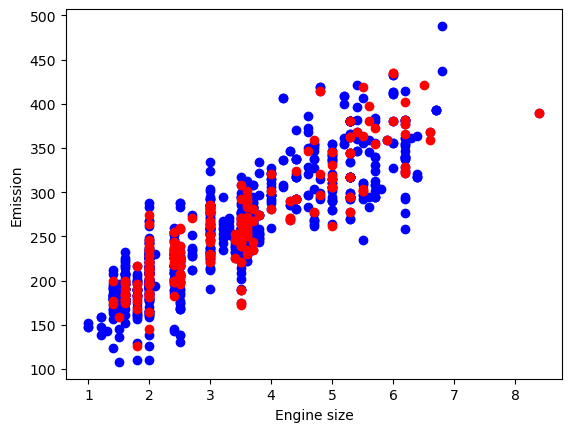

In [25]:
fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
ax1.scatter(test.ENGINESIZE, test.CO2EMISSIONS,  color='red')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Training the Linear Regression Model

In this section, we create and train a linear regression model to predict CO2 emissions based on engine size. This model will help us understand the relationship between these two variables and make predictions for unseen data.

- **`reg = linear_model.LinearRegression()`**: Initializes a new instance of the `LinearRegression` class from the `sklearn.linear_model` module. This object will be used to fit our model to the training data.
- **`train_x = np.asanyarray(train[['ENGINESIZE']])`**: Converts the training data for engine size into a NumPy array, ensuring that the data is in the correct format for training the model.
- **`train_y = np.asanyarray(train[['CO2EMISSIONS']])`**: Converts the training data for CO2 emissions into a NumPy array, which will be used as the target variable during training.
- **`reg.fit(train_x, train_y)`**: Fits the linear regression model to the training data, where it learns the relationship between engine size (independent variable) and CO2 emissions (dependent variable).

Once the model is trained, we can use it to make predictions on both the training and testing datasets.

Let's execute the code to train the model:


In [26]:
reg=linear_model.LinearRegression()
train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])
reg.fit (train_x, train_y)

LinearRegression()

## Model Coefficients and Intercept

In this section, we examine the coefficients and the intercept of the trained linear regression model. These values are crucial as they define the equation of the regression line.

- **`print('Coefficients: ', reg.coef_)`**: This command outputs the coefficient(s) of the linear regression model. The coefficient represents the change in the dependent variable (CO2 emissions) for a one-unit change in the independent variable (engine size). A positive coefficient indicates a direct relationship, while a negative coefficient indicates an inverse relationship.
  
- **`print('Intercept: ', reg.intercept_)`**: This command outputs the intercept of the regression line. The intercept is the expected mean value of the dependent variable when all independent variables are equal to zero. It provides a starting point for the regression line on the y-axis.

By analyzing these parameters, we can gain insights into the relationship between engine size and CO2 emissions, which is essential for interpreting the results of our regression model.

Let's execute the code to display the coefficients and intercept:

In [28]:
print ('Coefficients: ', reg.coef_)
print ('Intercept: ',reg.intercept_)

Coefficients:  [[39.06729024]]
Intercept:  [125.52242385]


## Testing the Model with the Test Data

In this section, we prepare the test data and use the trained linear regression model to make predictions. This will allow us to evaluate the model’s performance on unseen data.

- **`test_x = np.asanyarray(test[['ENGINESIZE']])`**: Converts the test data for engine size into a NumPy array, ensuring compatibility with the model's input format.
- **`test_y = np.asanyarray(test[['CO2EMISSIONS']])`**: Converts the test data for CO2 emissions into a NumPy array, which will serve as the actual values for comparison against the predicted values.
- **`test_yp = reg.predict(test_x)`**: Uses the trained model to predict CO2 emissions based on the engine size values in `test_x`. The resulting `test_yp` array contains the predicted CO2 emissions for each sample in the test set.

These predictions can be used to assess the model’s accuracy by comparing them to the actual values in `test_y`.

Let's execute the code to generate predictions:


In [29]:
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_yp = reg.predict(test_x)

## Visualizing the Regression Model and Test Results

In this section, we create multiple subplots to visualize the relationships in our dataset, the results of our linear regression model, and the comparison between actual and predicted values. This allows for a comprehensive view of model performance and the data distribution.

- **Figure Setup**: We initialize a `fig` object with a size of 10x8 and create individual subplots for each visualization.

### Subplot Descriptions:

1. **ENGINESIZE vs CO2EMISSIONS (Train and Test Data)**:
   - **`ax1`**: A scatter plot that displays the relationship between engine size and CO2 emissions for both the training (blue) and test (red) datasets. This helps us observe the general trend and distribution in both sets.

2. **Actual vs Predicted CO2 Emissions**:
   - **`ax2`**: A scatter plot where the green points represent actual CO2 emissions from the training set, while the black points represent predicted CO2 emissions from the test set. This plot helps us evaluate the model’s predictions against actual values.

3. **ENGINESIZE vs CO2EMISSIONS with Regression Line**:
   - **`ax3`**: Another scatter plot of engine size and CO2 emissions for the training data (blue), but with the addition of the regression line (red) fitted to the training data. This line is plotted based on the model’s coefficient and intercept, illustrating the linear relationship that the model has learned.

Each subplot has been labeled with appropriate titles, x-axis, and y-axis labels for clarity. This multi-view visualization provides insights into the model's fitting and prediction capabilities.

Let's execute the code to view these plots:


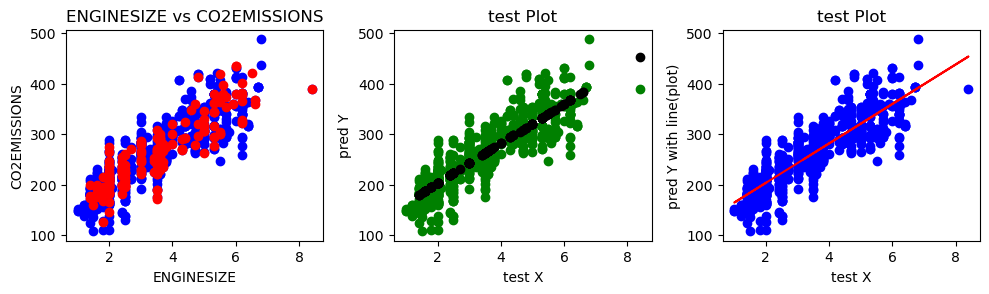

In [30]:
fig = plt.figure(figsize=(10, 8))
ax1=fig.add_subplot(331)
ax1.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
ax1.scatter(test.ENGINESIZE, test.CO2EMISSIONS,  color='red')
ax1.set_title('ENGINESIZE vs CO2EMISSIONS')
ax1.set_xlabel('ENGINESIZE')
ax1.set_ylabel('CO2EMISSIONS')

ax2=fig.add_subplot(332)
ax2.scatter(train_x, train_y,  color='green')
ax2.scatter(test_x, test_yp,  color='black')
ax2.set_title('test Plot')
ax2.set_xlabel('test X')
ax2.set_ylabel('pred Y')

ax3=fig.add_subplot(333)
ax3.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
ax3.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], '-r')
ax3.set_title('test Plot')
ax3.set_xlabel('test X')
ax3.set_ylabel('pred Y with line(plot)')
plt.tight_layout() 

plt.show()

## Visualizing the Training Data with Regression Line

This plot shows the relationship between **Engine Size** and **CO2 Emissions** in the training dataset. It also includes the regression line generated by our linear regression model, allowing us to observe how well the line fits the training data.

- **Blue Points**: Each blue point represents a data sample from the training set, showing the actual CO2 emissions for a given engine size.
- **Red Line**: The red line represents the linear regression model's fit, calculated using the formula: 
  \[
  \text{CO2 Emissions} = (\text{Coefficient} \times \text{Engine Size}) + \text{Intercept}
  \]

This visualization helps in understanding the linear relationship between engine size and CO2 emissions as captured by the model.

Let's execute the code to generate the plot:


Text(0, 0.5, 'Emission')

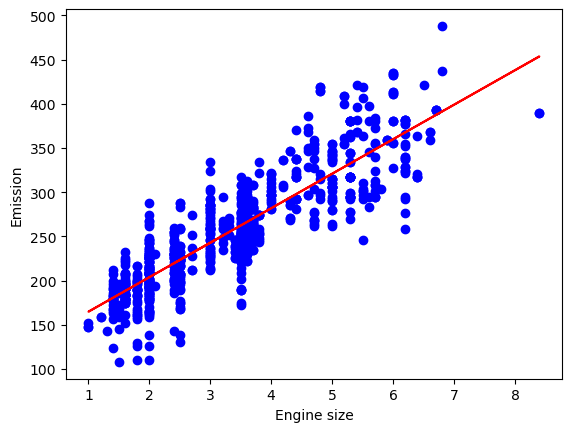

In [58]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Evaluating Model Performance

To assess the accuracy of our linear regression model, we use the following evaluation metrics:

1. **Mean Absolute Error (MAE)**:
   - This metric calculates the average of absolute differences between the predicted and actual values. A lower value indicates that the model's predictions are close to the actual values on average.
   - Formula: 
     \[
     \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_{\text{pred}} - y_{\text{actual}}|
     \]

2. **Mean Squared Error (MSE)** (also known as Residual Sum of Squares):
   - MSE computes the average of the squared differences between predicted and actual values, penalizing larger errors more significantly. A lower MSE indicates better model performance.
   - Formula:
     \[
     \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{pred}} - y_{\text{actual}})^2
     \]

3. **R² Score**:
   - The R² score, also known as the coefficient of determination, indicates how well the model explains the variance in the target variable. A score close to 1 means the model explains most of the variance, while a score closer to 0 means the model explains very little.
   - Formula:
     \[
     R^2 = 1 - \frac{\sum (y_{\text{actual}} - y_{\text{pred}})^2}{\sum (y_{\text{actual}} - \bar{y})^2}
     \]

Let's calculate and display these metrics:


In [31]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_yp - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_yp - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_yp) )

Mean absolute error: 22.49
Residual sum of squares (MSE): 883.44
R2-score: 0.79


## Additional Resources on Simple Linear Regression

For a deeper understanding of simple linear regression, consider exploring these well-regarded resources:

1. **Scikit-Learn Documentation**: This documentation covers the implementation details of linear regression in Python, with adjustable parameters like `fit_intercept` and `positive coefficients`. It's a great resource for understanding the theoretical aspects and practical application. [Scikit-Learn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)&#8203;:contentReference[oaicite:0]{index=0}.

2. **Real Python**: Real Python offers a comprehensive guide to simple linear regression, including practical code examples, model interpretation, and error analysis. This guide also covers related topics like polynomial regression and multiple regression. [Real Python](https://realpython.com/linear-regression-in-python/)&#8203;:contentReference[oaicite:1]{index=1}.

3. **Towards Data Science**: This article provides an in-depth look at simple linear regression, covering everything from setting up data and plotting to diagnosing issues like overfitting and underfitting. It’s an accessible read for both beginners and those looking to refine their skills. [Towards Data Science](https://towardsdatascience.com/simple-linear-regression-in-python-53d32a2d1229)&#8203;:contentReference[oaicite:2]{index=2}.

These resources will help you gain a more complete view of the theoretical and practical aspects of simple linear regression.
